# Cálculo de derivadas numéricas

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: lun jul  6 19:29:17 CDT 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (10,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

Definimos un arreglo con $N$ diferentes tamaños de $h$:

In [2]:
h = np.asarray([0.1, 0.05, 0.01, 0.005, 0.001])
N = len(h)
x = np.ones(N)
print('h = {}'.format(h))
print('x = {}'.format(x))

h = [0.1   0.05  0.01  0.005 0.001]
x = [1. 1. 1. 1. 1.]


### Aproximación de la primera derivada usando diferencias finitas hacia adelante (Forward):

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

In [3]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

In [4]:
# Calculamos el error entre la derivada exacta y la derivada numérica 
# usando diferencias finitas hacia adelante:
ef = np.fabs( np.cos(x) - forwardFD(np.sin, x, h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).transpose(), 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,0.100,0.042939
1,0.050,0.021257
2,0.010,0.004216
3,0.005,0.002106
4,0.001,0.000421


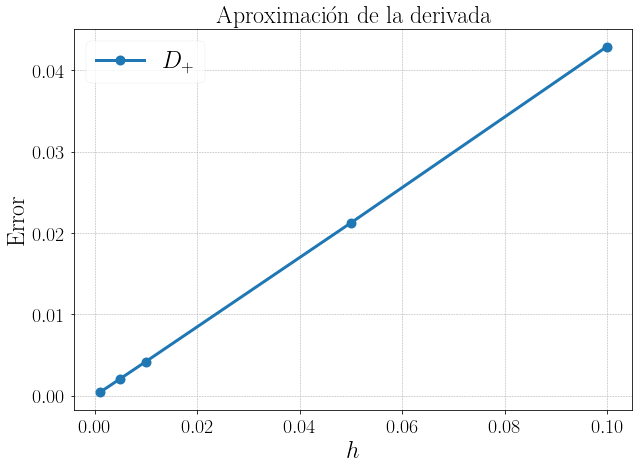

In [5]:
# Hacemos el gráfico del error vs h:
plt.plot(h, ef, 'o-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacia atrás (Backward):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

In [6]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

In [7]:
# Calculamos el error entre la derivada exacta y la derivada numérica 
# usando diferencias finitas hacia atrás:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

# Metemos la información de h y de los errores en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,0.100,0.042939,0.041138
1,0.050,0.021257,0.020807
2,0.010,0.004216,0.004198
3,0.005,0.002106,0.002101
4,0.001,0.000421,0.000421


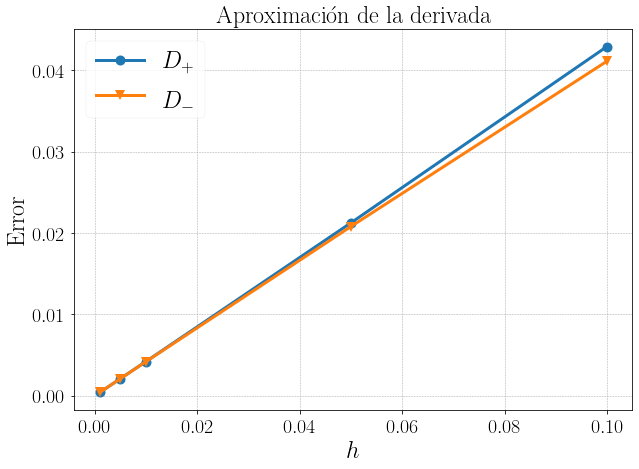

In [8]:
# Hacemos el gráfico de los errores vs h
plt.plot(h, ef, 'o-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacía centradas (Centered):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

In [9]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [10]:
# Calculamos el error entre la derivada exacta y la derivada numérica 
# usando diferencias finitas centradas:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

# Metemos la información de h y de los errores en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
Error

,$h$,$D_+$,$D_-$,$D_0$
0,0.100,0.042939,0.041138,9.000537e-04
1,0.050,0.021257,0.020807,2.250978e-04
2,0.010,0.004216,0.004198,9.004993e-06
3,0.005,0.002106,0.002101,2.251257e-06
4,0.001,0.000421,0.000421,9.005045e-08


Observe la diferencia entre los errores de $D_+$, $D_-$ y $D_0$. Para hacer una gráfica más representativa de estos errores usaremos escala log-log:

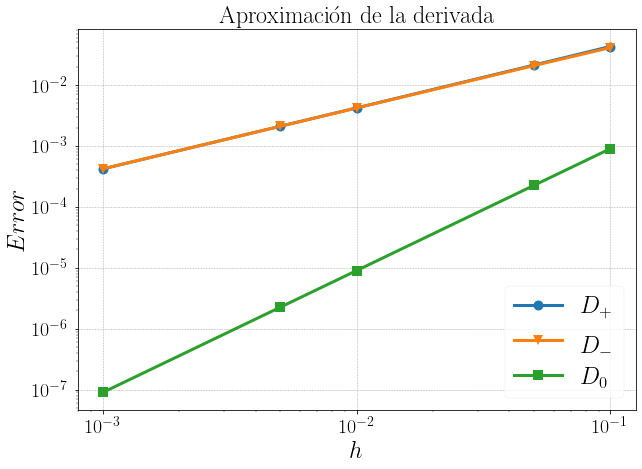

In [11]:
# Hacemos el gráfico de los errores vs h
plt.plot(h, ef, 'o-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('$Error$')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.grid()
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

# Ejercicio.
Implementar $D_{-2}$,  $D_{+2}$ y $D_{3}$, y para cada uno de ellos 1) calcular el error absoluto, 2) incluir todos los errores en un data frame y 3) hacer la gráfica de todos los errores vs $h$.

**Hint**:
Siga los pasos realizados anteriormente, es decir:

1. Definir una función para cada casos del siguiente estilo:

```python
def D_m2(u,x,h):
    return INSERTAR LA FÓRMULA CORRESPONDIENTE

def D_p2(u,x,h):
    return INSERTAR LA FÓRMULA CORRESPONDIENTE

def D_3(u,x,h):
    return INSERTAR LA FÓRMULA CORRESPONDIENTE
```
2. Calcular el error en cada caso como sigue:
```python
em2 = np.fabs( np.cos(x) - D_m2(np.sin,x,h) )
ep2 = np.fabs( np.cos(x) - D_p2(np.sin,x,h) )
e3  = np.fabs( np.cos(x) - D_3(np.sin,x,h) )
```
3. Insertar los errores en un Dataframe:
```python
Error = pd.DataFrame(np.array([h,ef,eb,ec,em2,ep2,e3]).transpose(), 
                     columns=['$h$','$D_+$','$D_-$','$D_0$','$D_{-2}$','$D_{+2}$','$D_{3}$'])
Error
```

2. Realizar las gráficas:
```python
plt.plot(h, ef, 'o-', lw=5, c='orange', label='$D_+$')
... 
plt.plot(h, e3, 'P-', lw=2, label='$D_3$')
```

# SOLUCIÓN

In [12]:
# Implementación
def D_m2(u,x,h):
    return (-3*u(x) + 4*u(x+h) - u(x+2*h)) / (2*h)

# Implementación
def D_p2(u,x,h):
    return (3*u(x) - 4*u(x-h) + u(x-2*h)) / (2*h)

# Implementación de D3
def D3(u,x,h):
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h)) / (6*h)

In [13]:
# Calculamos los errores:
ep2 = np.fabs( np.cos(x) - D_p2(np.sin,x,h) )
em2 = np.fabs( np.cos(x) - D_m2(np.sin,x,h) )
e3 = np.fabs( np.cos(x) - D3(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,ep2,em2,e3]).transpose(), 
                     columns=['$h$','$D_+$','$D_-$','$D_0$','$D_{+2}$','$D_{-2}$','$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_{+2}$,$D_{-2}$,$D_3$
0,0.100,0.042939,0.041138,9.000537e-04,2.004728e-03,1.584693e-03,6.820693e-05
1,0.050,0.021257,0.020807,2.250978e-04,4.761431e-04,4.235730e-04,8.649142e-06
2,0.010,0.004216,0.004198,9.004993e-06,1.821981e-05,1.779908e-05,6.994130e-08
3,0.005,0.002106,0.002101,2.251257e-06,4.528776e-06,4.476184e-06,8.754000e-09
4,0.001,0.000421,0.000421,9.005045e-08,1.803108e-07,1.798903e-07,6.997947e-11


In [19]:
tabla = Error.to_latex(index=False)
with open('tabla.tex', 'w') as tf:
     tf.write(tabla)

In [ ]:
# Hacemos las gráficas del error vs h
plt.plot(h, ef, 'o-', lw=5, c='orange', label='$D_+$')
plt.plot(h, eb, '.-', lw=2, c='k', label='$D_-$')
plt.plot(h, ec, '*-', lw=2, label='$D_0$')
plt.plot(h, ep2, 's-', lw=5, c='cyan', label='$D_{+2}$')
plt.plot(h, em2, 'p-', lw=2, c='purple', label='$D_{-2}$')
plt.plot(h, e3, 'P-', lw=2, c='red', label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('$E$')
plt.title('Aproximación de la derivada')
plt.legend(fontsize=20)
plt.loglog()  # Definimos la escala log-log
plt.grid()
plt.savefig('LogLogFDM.pdf')
plt.show()